In [1]:
# Setting the PythonPath
import os

# # Get the parent directory of the current working directory
parent_dir = os.path.dirname(os.getcwd())
if "changed" not in locals():
    changed = False

if not changed:
    os.chdir(parent_dir)
    changed = True
print(os.getcwd())

%load_ext autoreload
%autoreload 2

/home/local/USHERBROOKE/aara2601/projects/effective-efficient-qrc


In [4]:
from src.settings import STORAGE_PATH

PROJECT_ROOT_PATH, STORAGE_PATH

('/home/local/USHERBROOKE/aara2601/projects/effective-efficient-qrc',
 '/home/local/USHERBROOKE/aara2601/projects/effective-efficient-qrc/storage')

In [3]:
from src.qrc.circuits.configs import RingQRConfig

input_dim = 10

cfg = RingQRConfig(input_dim=10, num_qubits=3, seed=12345)
cfg.topology

QRTopologyConfig(num_qubits=3, edges=((0, 1), (1, 2), (2, 0)))

In [3]:
# from src.circuit_factory import CircuitFactory
# from src.utils import angle_positioning_linear

# qc_reservoir = CircuitFactory.createIsingRingCircuit(cfg=cfg, angle_positioning=angle_positioning_linear, method="density_matrix")
# qc_reservoir.draw("mpl")

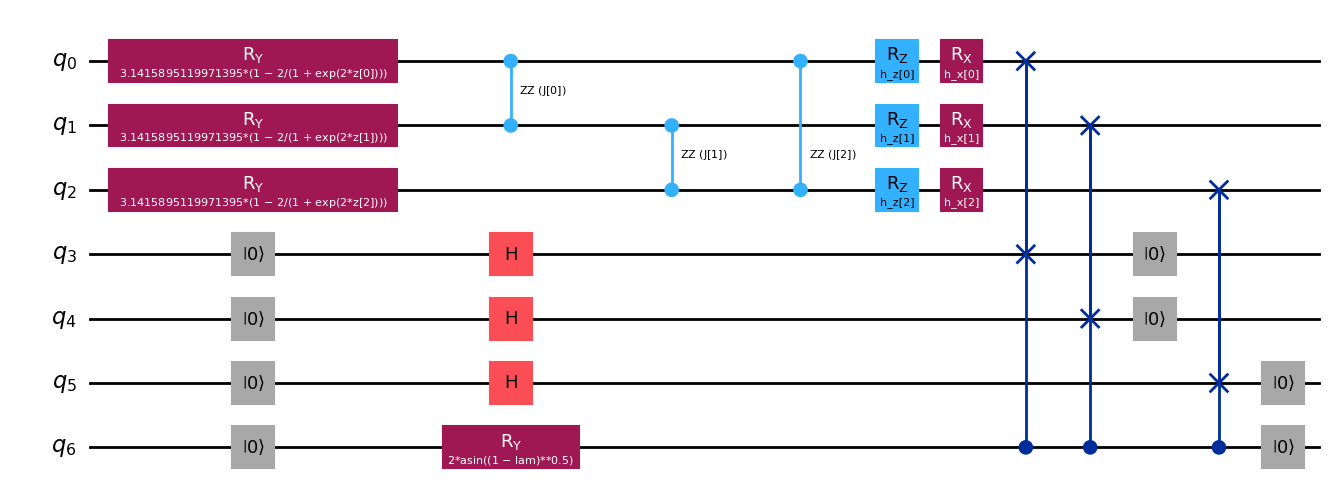

In [6]:
from src.qrc.circuits.circuit_factory import CircuitFactory
from src.qrc.circuits.utils import angle_positioning_tanh, angle_positioning_linear

qc_reservoir = CircuitFactory.createIsingRingCircuitSWAP(cfg=cfg, angle_positioning=angle_positioning_tanh)
qc_reservoir.draw("mpl")

In [6]:
# import numpy as np
# from math import pi

# z_params = qc_reservoir.metadata["z"]
# rzz_params = qc_reservoir.metadata["J"]
# rx_params = qc_reservoir.metadata["h_x"]
# rz_params = qc_reservoir.metadata["h_z"]
# lam_param = qc_reservoir.metadata["lam"]

# eps = 1e-8

# z_t = np.random.uniform(-1 + eps, 1 - eps, size=len(rzz_params))
# rzz_values = np.random.uniform(-np.pi, np.pi, size=len(rzz_params))
# rx_values  = np.random.uniform(-np.pi, np.pi, size=len(rx_params))
# rz_values  = np.random.uniform(-np.pi, np.pi, size=len(rz_params))
# lam_value = np.random.uniform(eps, 1)

# bind_map_input = dict(zip(z_params, z_t))

# bind_map_rzz = dict(zip(rzz_params, rzz_values))
# bind_map_rx = dict(zip(rx_params, rx_values))
# bind_map_rz = dict(zip(rz_params, rz_values))
# bind_map_lam = {lam_param: lam_value}

# bind_map_params = bind_map_rzz | bind_map_rx | bind_map_rz | bind_map_lam

# bind_map = bind_map_input | bind_map_params

# qc_bound = qc_reservoir.assign_parameters(bind_map)
# qc_bound.draw("mpl")

In [10]:
# import numpy as np

# eps = 1e-8

# w = 3
# x_window = np.random.uniform(-1 + eps, 1 - eps, size=(w, input_dim))
# qc = CircuitFactory.instantiateFullIsingRingEvolution(cfg=cfg, angle_positioning=angle_positioning_linear, x_window=x_window)
# qc.draw("mpl")

In [20]:
import numpy as np
from src.circuit_factory import CircuitFactory

N = 100
w = 3

X = np.random.uniform(-1 + eps, 1 - eps, size=(N, w, input_dim))

pubs = CircuitFactory.create_pubs_dataset_reservoirs_IsingRingSWAP(
            cfg=cfg,
            angle_positioning=angle_positioning_linear,
            X=X,
            lam_0=0.05,
            num_reservoirs=3,)

In [26]:
pubs[0][1].shape

(3, 10)